In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sys
import os
pd.set_option('display.float_format', '{:.4f}'.format)


In [13]:
sys.path.append(os.path.abspath(".."))


In [14]:
results = pd.read_csv ('../database/csvki/shapes_dataset.csv', sep = ',')
results

,game_id,student_id,correct,incorrect,time
0,1,1,1,5,20.74
1,2,1,4,6,18.30
2,3,5,4,3,21.53
3,4,3,0,6,18.97
4,5,3,4,2,18.42
5,6,3,3,1,21.61
6,7,5,2,5,17.91
7,8,5,4,4,22.26
8,9,5,2,3,19.54
9,10,5,2,1,19.98


In [253]:
cor = np.random.binomial(6,0.92, size = 1000)
incor = 6- cor
game_id = np.array(np.arange(1,1001,1))
student_id = np.random.uniform(1,101,size = 1000)
student_id = student_id.astype('int')
time = np.random.normal(18,2.4, size = 1000)

df = pd.DataFrame({
    'game_id': game_id,
    'student_id': student_id,
    'correct': cor,
    'incorrect': incor,
    'time': time
})
#df.to_csv('../database/csvki/shapes_dataset.csv', sep = ',')

In [254]:
game_id = np.array(np.arange(1002,1032,1))
student_id = np.random.uniform(101,105,size = 30)
student_id = student_id.astype('int')
i = np.random.uniform(0,2,size=30)
i = i.astype('int')

time = i* np.random.normal(18,5, size = 30) + (1-i) * np.random.normal(12,2, size = 30)
cor = np.random.binomial(6,0.76-i*0.28, size = 30)
incor = 6- cor
df_2 = pd.DataFrame({
    'game_id': game_id,
    'student_id': student_id,
    'correct': cor,
    'incorrect': incor,
    'time': time
})

In [255]:
df_2.head(30)

,game_id,student_id,correct,incorrect,time
0,1002,102,3,3,22.8932
1,1003,101,6,0,12.0779
2,1004,103,5,1,11.2787
3,1005,103,6,0,11.6684
4,1006,103,5,1,12.3237
5,1007,103,2,4,10.1419
6,1008,103,6,0,11.7863
7,1009,103,5,1,11.4574
8,1010,103,4,2,12.5034
9,1011,101,1,5,17.9049


In [256]:
results = pd.concat([df,df_2])
results

,game_id,student_id,correct,incorrect,time
0,1,58,6,0,11.7974
1,2,21,5,1,18.7346
2,3,73,5,1,19.4297
3,4,82,6,0,20.7599
4,5,15,6,0,16.8065
...,...,...,...,...,...
25,1027,104,3,3,20.1238
26,1028,103,5,1,16.2764
27,1029,101,1,5,21.5127
28,1030,103,3,3,12.6289


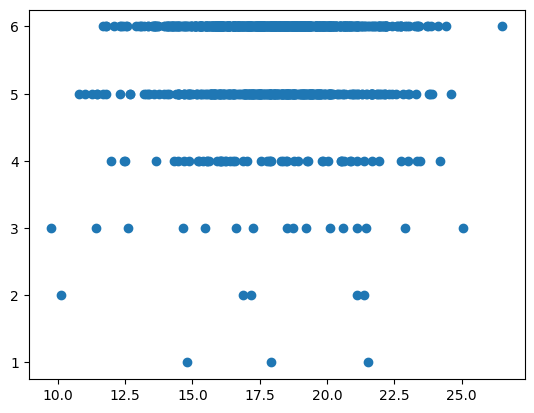

In [257]:
plt.scatter(results.iloc[:,4],results.iloc[:,2])

In [258]:
mapping = {6: 1.00, 5: 0.95, 4: 0.85, 3: 0.70, 2: 0.45, 1: 0.20, 0:0}
X1 = results.iloc[:,2].map(mapping)
X1 = X1.reset_index().iloc[:,-1]
X2 = results.iloc[:,4].reset_index().iloc[:,-1]

X = pd.concat((X1, X2), axis=1)
X

,correct,time
0,1.0000,11.7974
1,0.9500,18.7346
2,0.9500,19.4297
3,1.0000,20.7599
4,1.0000,16.8065
...,...,...
1025,0.7000,20.1238
1026,0.9500,16.2764
1027,0.2000,21.5127
1028,0.7000,12.6289


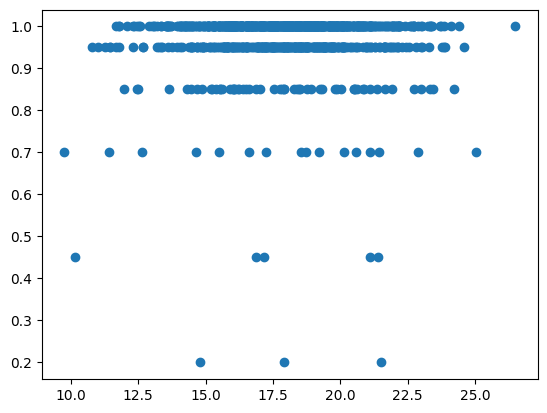

In [259]:
plt.scatter(X.iloc[:,1],X.iloc[:,0])

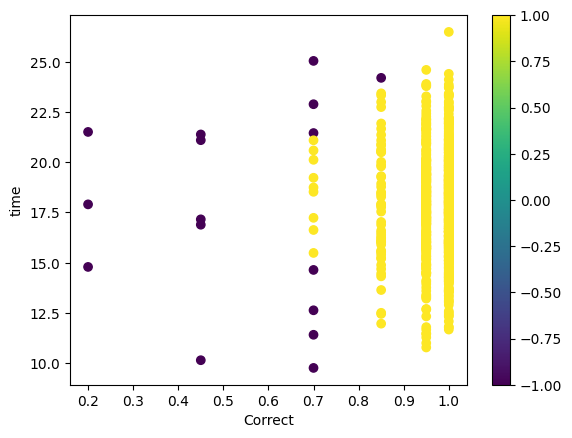

In [260]:
from sklearn.ensemble import IsolationForest
y = IsolationForest(random_state=0, contamination=0.015 ).fit_predict(X)

%matplotlib inline
#-1 outliers
plt.scatter(X.iloc[:,0],X.iloc[:,1], c = y)
plt.xlabel('Correct')
plt.ylabel('time')
plt.colorbar()
plt.show()

In [261]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X)

labels = dbscan.labels_

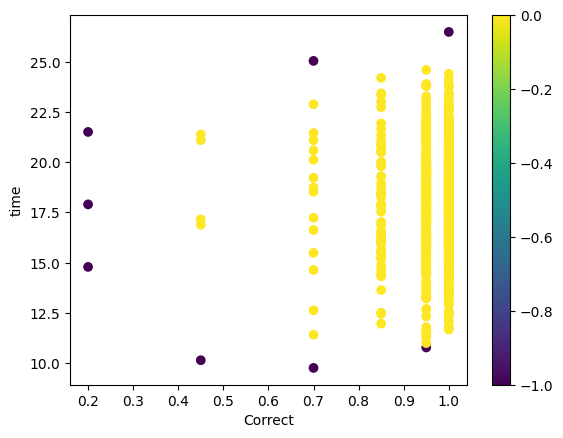

In [262]:
%matplotlib inline
#-1 outliers
plt.scatter(X.iloc[:,0],X.iloc[:,1], c = labels)
plt.xlabel('Correct')
plt.ylabel('time')
plt.colorbar()
plt.show()

In [263]:
labels

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [265]:
results = results.reset_index()
results

,index,game_id,student_id,correct,incorrect,time
0,0,1,58,6,0,11.7974
1,1,2,21,5,1,18.7346
2,2,3,73,5,1,19.4297
3,3,4,82,6,0,20.7599
4,4,5,15,6,0,16.8065
...,...,...,...,...,...,...
1025,25,1027,104,3,3,20.1238
1026,26,1028,103,5,1,16.2764
1027,27,1029,101,1,5,21.5127
1028,28,1030,103,3,3,12.6289


In [267]:
results = results.iloc[:,1:]

In [279]:
results.to_csv('../database/csvki/shapes_dataset.csv', sep = ',', index=False)


In [273]:
results.loc[:,'time'] = results.loc[:,'time'].round(2)

In [275]:
results['time'] = results['time'].map(lambda x: f"{x:.2f}")
results

,game_id,student_id,correct,incorrect,time
0,1,58,6,0,11.80
1,2,21,5,1,18.73
2,3,73,5,1,19.43
3,4,82,6,0,20.76
4,5,15,6,0,16.81
...,...,...,...,...,...
1025,1027,104,3,3,20.12
1026,1028,103,5,1,16.28
1027,1029,101,1,5,21.51
1028,1030,103,3,3,12.63


In [277]:
results

,game_id,student_id,correct,incorrect,time
0,1,58,6,0,11.80
1,2,21,5,1,18.73
2,3,73,5,1,19.43
3,4,82,6,0,20.76
4,5,15,6,0,16.81
...,...,...,...,...,...
1025,1027,104,3,3,20.12
1026,1028,103,5,1,16.28
1027,1029,101,1,5,21.51
1028,1030,103,3,3,12.63
